## Importing Dependencies ##

In [2]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\ahunt\anaconda3\envs\pythondata\lib\site-packages (0.11.1)


In [56]:
import pandas as pd
import numpy as np

## Read in the CSV File ##

In [57]:
#Read the CSV file into a pandas DataFrame 
MMR_race = pd.read_csv("../Resources/race_data.csv")
MMR_race

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,White,Not Hispanic or Latino,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903
384,Wisconsin,55,2009,White,Not Hispanic or Latino,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868
385,Wisconsin,55,2011,White,Not Hispanic or Latino,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868
386,Wisconsin,55,2014,White,Not Hispanic or Latino,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868


In [58]:
# Checking dataframe rows
MMR_race.count()

state                 388
state_code            388
year                  388
race                  388
hispanic_origin       388
births_by_race        388
deaths_by_race        388
mmr_by_race           388
population_by_race    388
id                    388
state_abbv            388
latitude              388
longitude             388
dtype: int64

In [59]:
# Checking data types and columns
MMR_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               388 non-null    object 
 1   state_code          388 non-null    int64  
 2   year                388 non-null    int64  
 3   race                388 non-null    object 
 4   hispanic_origin     388 non-null    object 
 5   births_by_race      388 non-null    int64  
 6   deaths_by_race      388 non-null    int64  
 7   mmr_by_race         388 non-null    float64
 8   population_by_race  388 non-null    int64  
 9   id                  388 non-null    object 
 10  state_abbv          388 non-null    object 
 11  latitude            388 non-null    float64
 12  longitude           388 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 39.5+ KB


In [60]:
#List out all coumns
MMR_race.columns

Index(['state', 'state_code', 'year', 'race', 'hispanic_origin',
       'births_by_race', 'deaths_by_race', 'mmr_by_race', 'population_by_race',
       'id', 'state_abbv', 'latitude', 'longitude'],
      dtype='object')

## Select Features for the Model ##

In [61]:
# Selecting the features from the dataframe that will be the X values
selected_features = MMR_race[['race', 'hispanic_origin', 'mmr_by_race', 'population_by_race']]
selected_features.head()

,race,hispanic_origin,mmr_by_race,population_by_race
0,Black or African American,Not Hispanic or Latino,77.83,0
1,White,Not Hispanic or Latino,50.96,0
2,Black or African American,Not Hispanic or Latino,136.21,704201
3,White,Not Hispanic or Latino,43.12,1655605
4,Black or African American,Not Hispanic or Latino,78.04,706754


## Plotting Data for Visualization ##

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

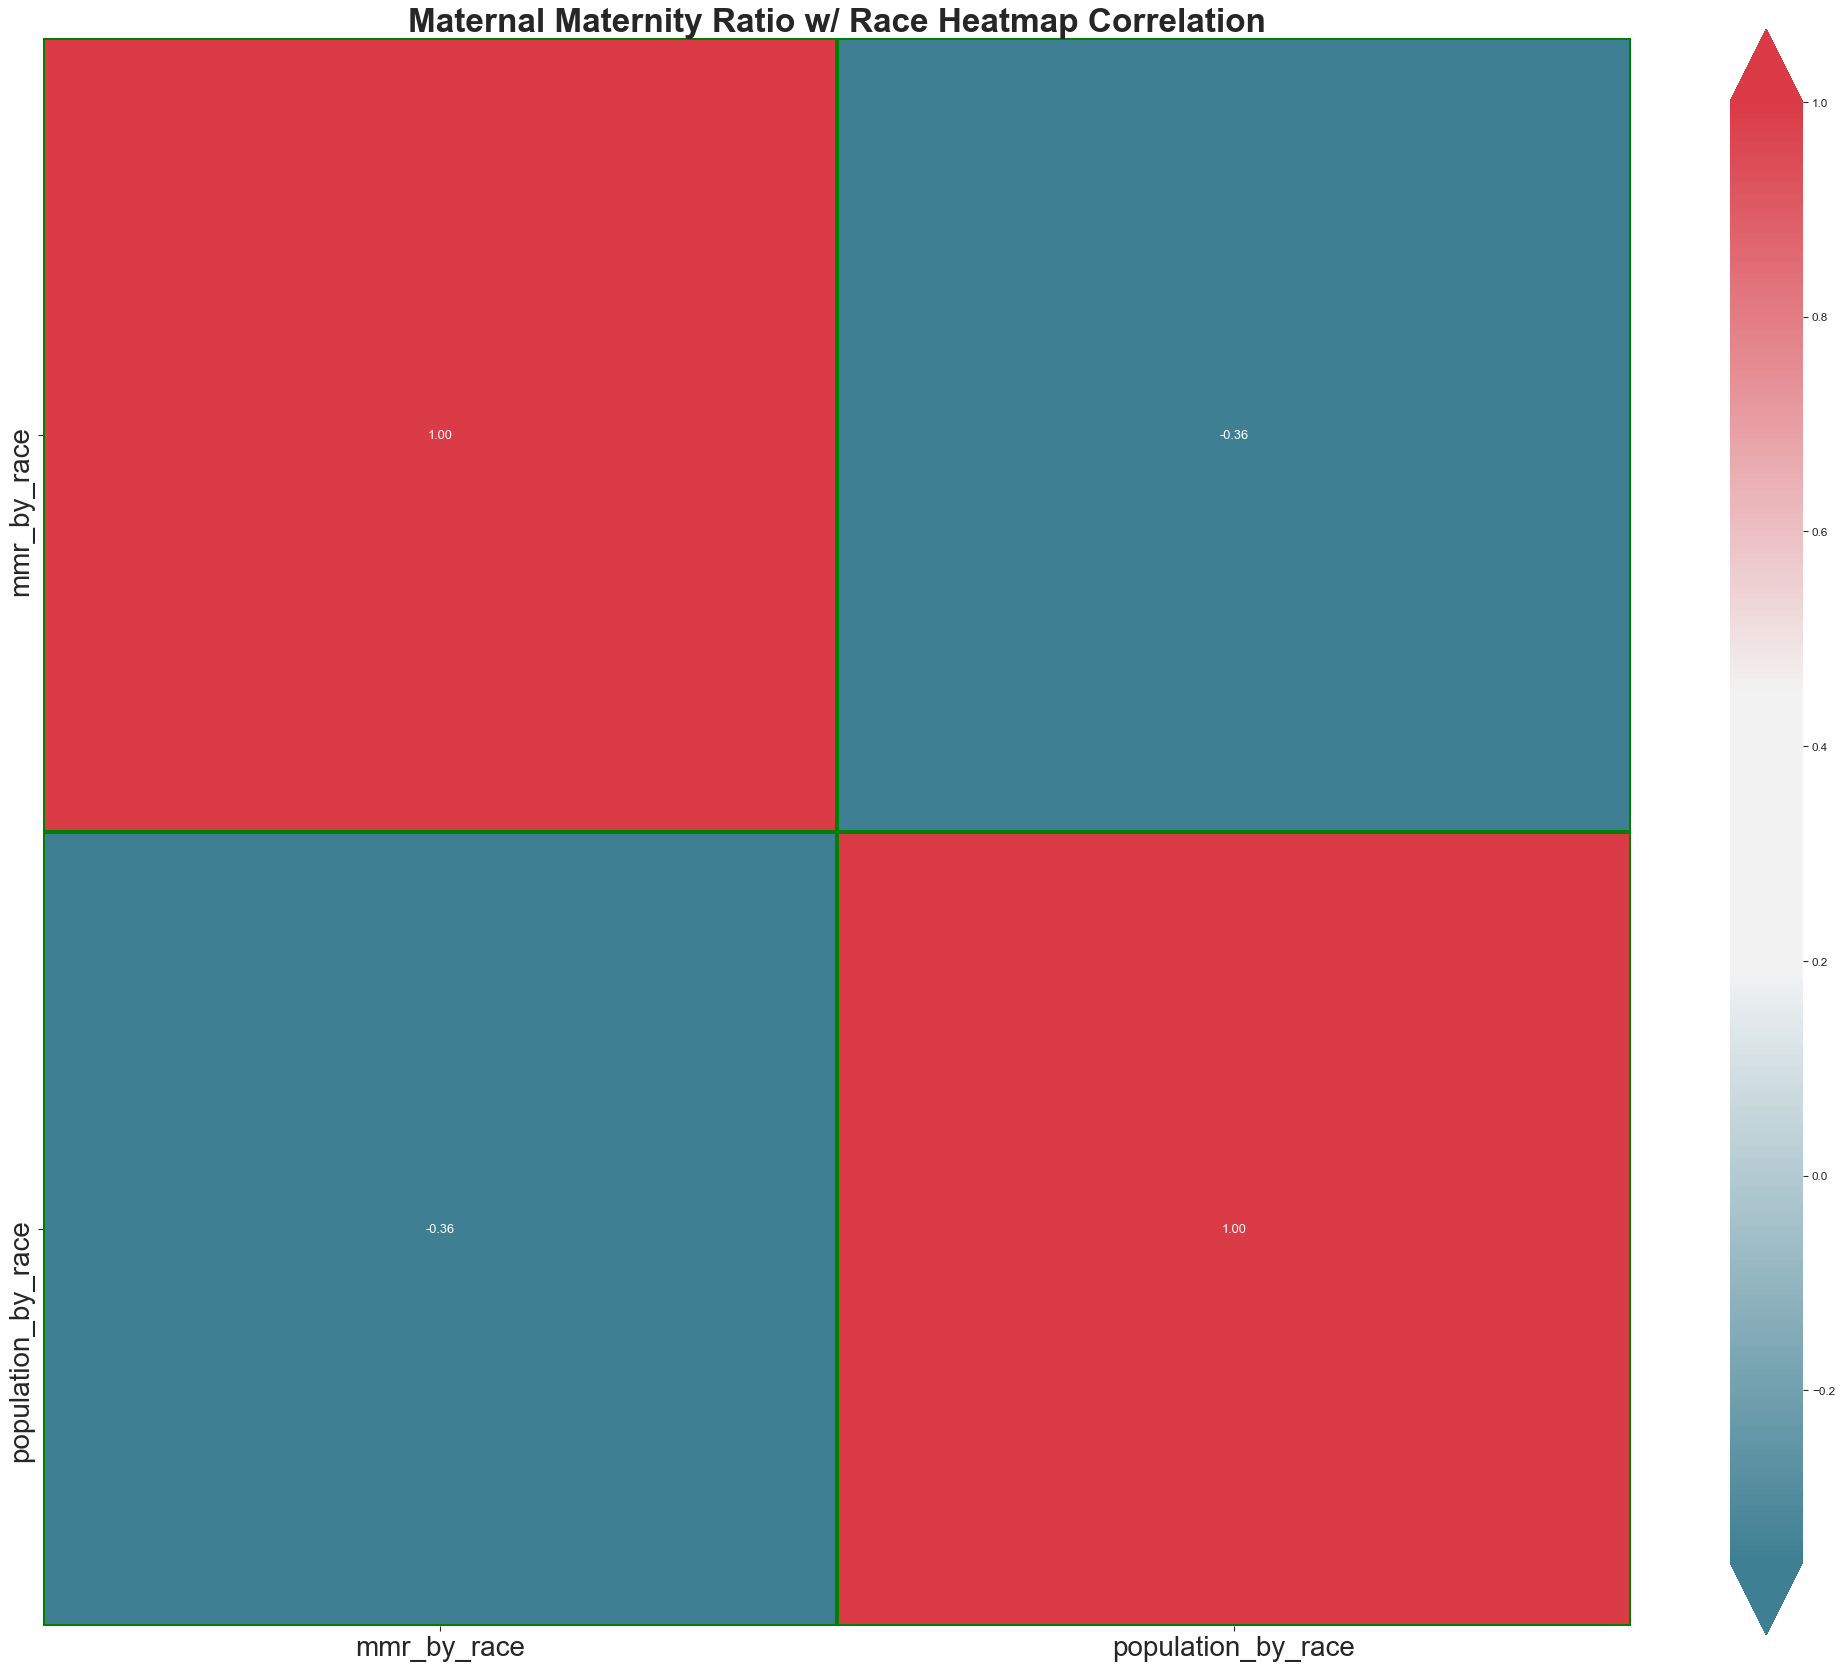

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(32, 28), dpi=80, facecolor='w', edgecolor='k')

# Calculating the correlation matrix for each feature in dataset 
corr = selected_features.dropna().corr()

# Setting features
top_corr_features = corr.index
top_corr_features 

sns.set_theme(context = "paper", style="ticks", font_scale=1.2)

# Plotting the heatmap
sns.heatmap(corr[top_corr_features], cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, annot=True, ax=ax, fmt='.2f', linewidths=2, linecolor='green', cbar_kws={"shrink": .95, "extend":'both'})

# Adjusting the x & y ticks and adding title
ax.set(title="Maternal Maternity Ratio Heatmap Correlation")
plt.title("Maternal Maternity Ratio w/ Race Heatmap Correlation", fontsize = 30, fontweight='bold')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


## Creating a Train Test Split ##

In [62]:
# Use Pandas get_dummies to convert categorical data

selected_features_transformed = pd.get_dummies(selected_features)
selected_features_transformed.head()

,mmr_by_race,population_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,77.83,0,0,1,0,0,1
1,50.96,0,0,0,1,0,1
2,136.21,704201,0,1,0,0,1
3,43.12,1655605,0,0,1,0,1
4,78.04,706754,0,1,0,0,1


In [63]:
# Selecting and assigning the X & y values
y = MMR_race['mmr_by_race'].values.reshape(-1,1)
X = selected_features_transformed.drop(columns=['mmr_by_race'], axis=1)

In [64]:
# Print the selecting X & y shapes
print('Shape:', X.shape, y.shape)

Shape: (388, 6) (388, 1)


### Create a Train Test Split ###

In [65]:
# Spliting our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

In [66]:
# Checking X_train length
len(X_train)

271

In [67]:
# Checking y_train length
len(y_train)

271

In [68]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [69]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Linear Regression Baseline Model ##

In [70]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [71]:
#Step 1: Creating a linear regression model
model = LinearRegression()
model

LinearRegression()

In [72]:
# Step 2: Fitting (train) our model to the data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Obtaining the coefficient of determination (R2)
r_sq = model.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.5637381580385683


In [74]:
# Printing the intercept
print('intercept:', model.intercept_)

intercept: [39.09427819]


In [75]:
# Printing the slope
print('slope:', model.coef_)

slope: [[-1.44640993e-06 -2.45989563e+01  3.29446950e+01 -8.34573872e+00
  -3.84357548e+00  3.84357548e+00]]


In [76]:
# Step 3: Predicting
y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[31.78438304]
 [34.59211495]
 [75.88254871]
 [28.47794055]
 [26.14689183]
 [26.90496399]
 [26.90496399]
 [34.59211495]
 [25.72480627]
 [26.90496399]
 [74.71760437]
 [23.6608791 ]
 [34.59211495]
 [74.98825948]
 [30.85130977]
 [34.59211495]
 [27.72065382]
 [75.88254871]
 [30.66798455]
 [74.82055548]
 [27.7360957 ]
 [74.98016827]
 [30.92262068]
 [31.68395445]
 [31.77965617]
 [30.67404934]
 [74.80543327]
 [26.90496399]
 [34.59211495]
 [73.18719851]
 [23.13667702]
 [74.78045811]
 [73.61374336]
 [73.57189727]
 [23.37219158]
 [75.88254871]
 [75.88254871]
 [75.88254871]
 [34.59211495]
 [26.35125799]
 [75.88254871]
 [26.53674126]
 [75.88254871]
 [75.88254871]
 [75.88254871]
 [26.37761591]
 [34.59211495]
 [75.88254871]
 [74.70624137]
 [29.74983679]
 [29.0300034 ]
 [32.21914638]
 [74.84659665]
 [75.88254871]
 [29.05769492]
 [75.88254871]
 [25.3924213 ]
 [26.90496399]
 [34.59211495]
 [75.88254871]
 [16.74923384]
 [26.90496399]
 [19.45654874]
 [75.88254871]
 [74.15817784]
 [74.

In [77]:
# Predicting the min & max values
X_min = np.array([X.min()])
X_max = np.array([X.max()])
print(f"Min X Value: {X_min}")
print(f"Max X Value: {X_max}")

Min X Value: [[0 0 0 0 0 0]]
Max X Value: [[7757084       1       1       1       1       1]]


In [78]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(X_min)
y_max = model.predict(X_max)
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")


Min Y Value: [[39.09427819]]
Max Y Value: [[27.87435483]]


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Using the model to predict a value
predicted = model.predict(X)

# Scoring the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 338.0795577253865
R-squared (R2 ): 0.576557810372901


In [80]:
# Fitting the model to the training data and calculating the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5637381580385683
Testing Score: 0.6055512579941524


Text(0.5, 1.0, 'Maternal Mortality with Race')

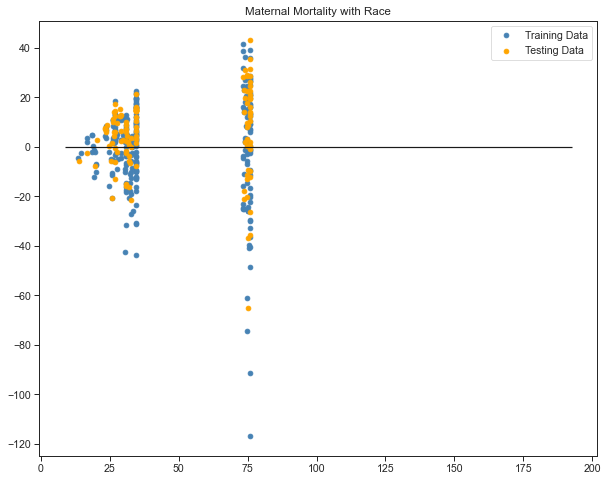

In [81]:
# Plotting training and testing data
plt.figure(figsize=(10,8))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Maternal Mortality with Race")

### Create a simple lineaer regression model to make predictions for selected features ###

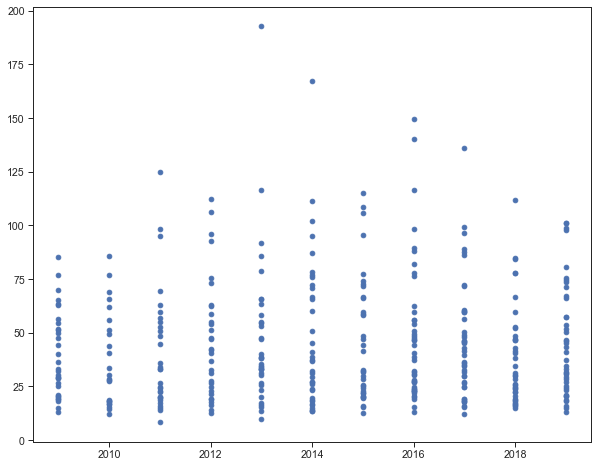

In [82]:
# Make predictions for maternal mortality ratio
X1 = MMR_race["year"].values.reshape(-1,1)
y1 = MMR_race["mmr_by_race"].values.reshape(-1,1)
plt.figure(figsize=(10,8))
plt.scatter(X1,y1)

In [83]:
# Using the `train_test_split` to create a training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [84]:
# Creating the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [85]:
model1.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [86]:
# Making the predictiions and displaying r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 820.2420577481126, R2: -0.0019601341876613887


In [87]:
# Make predictions for next 10 years
maternal_mortality_ratio =[]
for i in range(2019, 2030):
    r= model1.predict([[i]])
    maternal_mortality_ratio.append(float(r))
      
    
print(f"Maternal Mortality Ratio for the next 10 years:")
maternal_mortality_ratio

Maternal Mortality Ratio for the next 10 years:


[46.362965512411904,
 46.56959433593698,
 46.77622315946206,
 46.98285198298714,
 47.18948080651222,
 47.3961096300373,
 47.60273845356238,
 47.809367277087404,
 48.01599610061248,
 48.22262492413756,
 48.42925374766264]

In [88]:
# Creating a dictionary that holds predicted values
mmr_race_prediction = {
    "year":[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "maternal_mortality_ratio": maternal_mortality_ratio
}

# Creating a new dataframe to hold predictions
mmr_10years_predictions = pd.DataFrame(mmr_race_prediction)
mmr_10years_predictions

,year,maternal_mortality_ratio
0,2020,46.362966
1,2021,46.569594
2,2022,46.776223
3,2023,46.982852
4,2024,47.189481
5,2025,47.396110
6,2026,47.602738
7,2027,47.809367
8,2028,48.015996
9,2029,48.222625


Text(0, 0.5, 'Maternal Mortality Ratio')

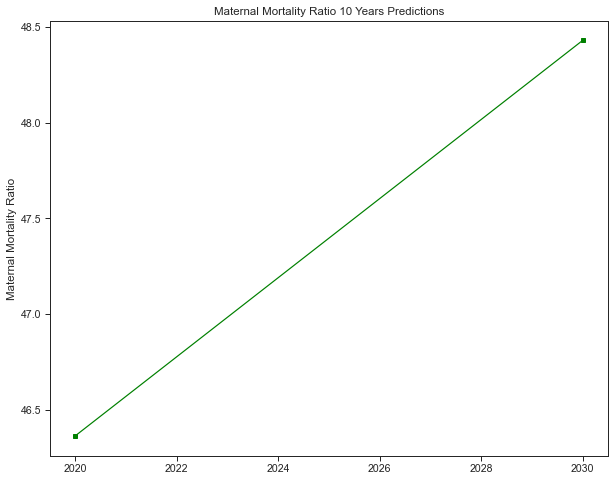

In [89]:
# Plotting the next 10 years predictions for MMR
plt.figure(figsize=(10,8))
plt.plot(mmr_10years_predictions["year"], mmr_10years_predictions["maternal_mortality_ratio"], marker="s",markevery = 10, color = "green")
plt.title("Maternal Mortality Ratio 10 Years Predictions")
plt.ylabel("Maternal Mortality Ratio")

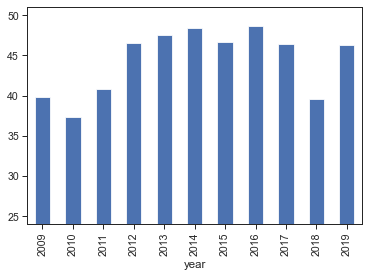

In [47]:
# Barplot of maternal mortality grouped by year
y = 'mmr_by_race'

# Grouping by year
AVG_MMR_USA_by_race = MMR_race.groupby('year').mean()[y]

# Plotting barplot of mmr by year
AVG_MMR_USA_by_race.plot(kind='bar',ylim=(24))